In [3]:
import matplotlib.pyplot as plt
import numpy as np


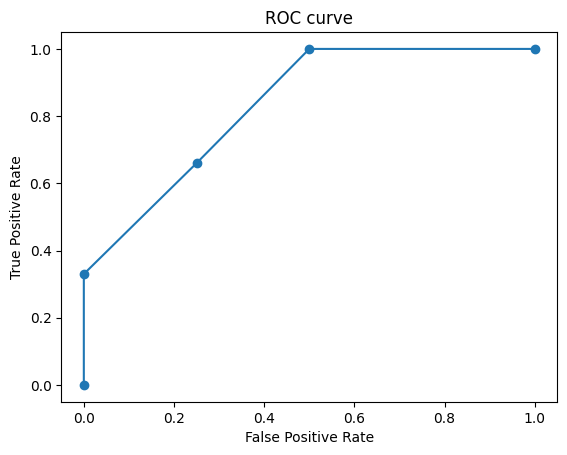

In [5]:
fpr = [0, 0, 0.25, 0.5, 1]
tpr = [0, 0.33, 0.66, 1, 1]
plt.plot(fpr,tpr, marker='o')
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [58]:
df = pd.read_csv("data/D2z.txt", sep=" ", header=None)
df = df.rename(columns={0: 'x1', 1: 'x2', 2: 'y'})
X_test = df[['x1','x2']]
Y_test = df[['y']]
train_df = pd.concat([X_test,Y_test],axis=1)
train_df_0 = train_df[train_df['y']==0]
train_df_1 = train_df[train_df['y']==1]

In [59]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_test, Y_test)

/home/madakasira/ece760/hw2/.venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

(3362,) (1681,)


/home/madakasira/ece760/hw2/.venv/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


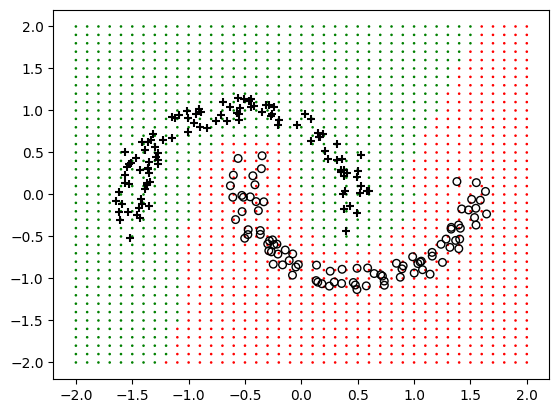

In [69]:
x1 = np.arange(-2,2.1,0.1)
x2 = np.arange(-2,2.1,0.1)

xv,yv = np.meshgrid(x1,x2)

xx = xv.reshape(xv.shape[0]*xv.shape[1],)
yy = yv.reshape(yv.shape[0]*yv.shape[1],)
xy = np.empty((xx.size + yy.size,), dtype=xx.dtype)
print(xy.shape,xx.shape)
xy[0::2] = xx
xy[1::2] = yy
xy = xy.reshape(xx.shape[0],2)
pred = neigh.predict(xy)
colors = ['red' if res == 0 else 'green' for res in pred]
train_markers = []
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(xx, yy,marker='.', c=colors,s=3)
ax1.scatter(train_df_0['x1'],train_df_0['x2'],marker='o',s=30,facecolors='none', edgecolors='black')
ax1.scatter(train_df_1['x1'],train_df_1['x2'],marker="+", c='black',s=30)
plt.show()


In [60]:
df = pd.read_csv("data/emails.csv",index_col=0)

In [18]:
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Email 4996,20,6,3,1,1,1,34,0,0,15,...,0,0,0,0,0,0,0,1,0,0
Email 4997,0,7,1,0,0,0,20,1,1,0,...,0,0,0,1,0,0,0,0,0,0
Email 4998,6,8,1,3,2,1,64,7,1,16,...,0,0,0,0,0,0,0,0,0,0


In [19]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [61]:
def run_training(X_train,Y_train,X_test,k,method='knn',ret_type='decision'):
    if (method=='knn'):
        neigh_1nn = KNeighborsClassifier(n_neighbors=k)
        neigh_1nn.fit(X_train, Y_train)
        if (ret_type=='decision'):
            test_res = neigh_1nn.predict(X_test)
        else:
            test_res = neigh_1nn.predict_proba(X_test)
    else:
        params = np.array([0]*(X_train.shape[1])) 
        lrate = 0.00001
        test_res = list()
        for idx,row in X_train.iterrows():
            y = Y_train[idx]
            thetax = np.dot(params,row.to_numpy())
            sigm = sigmoid(thetax)
            grad_p1 = -(y/sigm - (1-y)/(1-sigm))*(sigm)*(1-sigm)
            grad = grad_p1 * row.to_numpy()
            params = params -lrate*grad
            #print("Internals:",sigm,thetax,type(row.to_numpy()),grad_p1)
            if (sigm==1):
                return [0]
        for idx,row in X_test.iterrows():
            thetax = np.dot(params,row.to_numpy())
            pred_val = sigmoid(thetax)
            if (ret_type=='decision'):
                if (pred_val>0.5):
                    pred_val=1
                else:
                    pred_val=0
            test_res.append(pred_val)
        #test_res = sigmoid(thetax)
    #print(test_res)
    return test_res

In [21]:
#run_folds(df,1,'asd')

In [22]:
def run_fold_train_test(df_train,df_test,k=1,method="knn"):
    X_train = df_train.drop('Prediction',axis=1)
    Y_train  =df_train['Prediction']
    X_test = df_test.drop('Prediction',axis=1)
    Y_test = df_test.loc[:,'Prediction']
    TP=0
    TN=0
    FP=0
    FN=0
    # neigh_1nn = KNeighborsClassifier(n_neighbors=k)
    # neigh_1nn.fit(X_train, Y_train)
    #test_res = neigh_1nn.predict(X_test)
    test_res = run_training(X_train,Y_train,X_test,k,method)
    for rownum,(idx,val) in enumerate(Y_test.iteritems()):
        # print(rownum,idx,val,test_res[rownum])
        if (test_res[rownum]==val):
            if (val==0):
                TN+=1
            else:
                TP+=1
        else:
            if (val==0):
                FP+=1
            else:
                FN+=1
    print(TP,TN,FP,FN)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    recall = (TP)/(TP+FN)
    precision = (TP)/(TP+FP)
    print("accuracy=",accuracy,"recall=",recall,"precision=",precision)
    return (accuracy,recall,precision)

    

In [23]:
#fold1
def run_folds(df,k=1):
    df_test_1 = df.iloc[:1000,]
    df_train_1 = df.drop(df_test_1.index)
    (a1,r1,p1)=run_fold_train_test(df_train_1,df_test_1,k)
    df_test_2 = df.iloc[1000:2000,]
    df_train_2 = df.drop(df_test_2.index)
    (a2,r2,p2)=run_fold_train_test(df_train_2,df_test_2,k)
    df_test_3 = df.iloc[2000:3000,]
    df_train_3 = df.drop(df_test_3.index)
    (a3,r3,p3)=run_fold_train_test(df_train_3,df_test_3,k)
    df_test_4 = df.iloc[3000:4000,]
    df_train_4 = df.drop(df_test_4.index)
    (a4,r4,p4)=run_fold_train_test(df_train_4,df_test_4,k)
    df_test_5 = df.iloc[4000:5000,]
    df_train_5 = df.drop(df_test_5.index)
    (a5,r5,p5)=run_fold_train_test(df_train_5,df_test_5,k)
    avg_accuracy = (a1+a2+a3+a4+a5)/5
    print("average accuracy=",avg_accuracy)
    return(avg_accuracy)
#print(df_test_1['Prediction'].value_counts())

In [24]:
avg_accuracy = run_folds(df,1)

/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


233 592 123 52
accuracy= 0.825 recall= 0.8175438596491228 precision= 0.6544943820224719


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


240 613 110 37
accuracy= 0.853 recall= 0.8664259927797834 precision= 0.6857142857142857


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


238 624 92 46
accuracy= 0.862 recall= 0.8380281690140845 precision= 0.7212121212121212


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


240 611 95 54
accuracy= 0.851 recall= 0.8163265306122449 precision= 0.7164179104477612
232 543 151 74
accuracy= 0.775 recall= 0.7581699346405228 precision= 0.6057441253263708
average accuracy= 0.8332


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


233 592 123 52
accuracy= 0.825 recall= 0.8175438596491228 precision= 0.6544943820224719


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


240 613 110 37
accuracy= 0.853 recall= 0.8664259927797834 precision= 0.6857142857142857


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


238 624 92 46
accuracy= 0.862 recall= 0.8380281690140845 precision= 0.7212121212121212


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


240 611 95 54
accuracy= 0.851 recall= 0.8163265306122449 precision= 0.7164179104477612


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


232 543 151 74
accuracy= 0.775 recall= 0.7581699346405228 precision= 0.6057441253263708
average accuracy= 0.8332


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


249 598 117 36
accuracy= 0.847 recall= 0.8736842105263158 precision= 0.680327868852459


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


226 625 98 51
accuracy= 0.851 recall= 0.8158844765342961 precision= 0.6975308641975309


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


232 627 89 52
accuracy= 0.859 recall= 0.8169014084507042 precision= 0.7227414330218068


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


243 637 69 51
accuracy= 0.88 recall= 0.826530612244898 precision= 0.7788461538461539


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


224 550 144 82
accuracy= 0.774 recall= 0.7320261437908496 precision= 0.6086956521739131
average accuracy= 0.8422000000000001


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


242 595 120 43
accuracy= 0.837 recall= 0.8491228070175438 precision= 0.6685082872928176


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


217 633 90 60
accuracy= 0.85 recall= 0.7833935018050542 precision= 0.7068403908794788


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


231 638 78 53
accuracy= 0.869 recall= 0.8133802816901409 precision= 0.7475728155339806


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


237 632 74 57
accuracy= 0.869 recall= 0.8061224489795918 precision= 0.7620578778135049


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


229 550 144 77
accuracy= 0.779 recall= 0.7483660130718954 precision= 0.613941018766756
average accuracy= 0.8408


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


243 596 119 42
accuracy= 0.839 recall= 0.8526315789473684 precision= 0.6712707182320442


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


227 637 86 50
accuracy= 0.864 recall= 0.8194945848375451 precision= 0.7252396166134185


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


235 640 76 49
accuracy= 0.875 recall= 0.8274647887323944 precision= 0.7556270096463023


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


235 639 67 59
accuracy= 0.874 recall= 0.7993197278911565 precision= 0.7781456953642384


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


228 551 143 78
accuracy= 0.779 recall= 0.7450980392156863 precision= 0.6145552560646901
average accuracy= 0.8462


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


232 630 85 53
accuracy= 0.862 recall= 0.8140350877192982 precision= 0.7318611987381703


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


219 650 73 58
accuracy= 0.869 recall= 0.7906137184115524 precision= 0.75


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


223 655 61 61
accuracy= 0.878 recall= 0.7852112676056338 precision= 0.7852112676056338


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


229 658 48 65
accuracy= 0.887 recall= 0.7789115646258503 precision= 0.8267148014440433


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


211 571 123 95
accuracy= 0.782 recall= 0.6895424836601307 precision= 0.6317365269461078
average accuracy= 0.8556000000000001


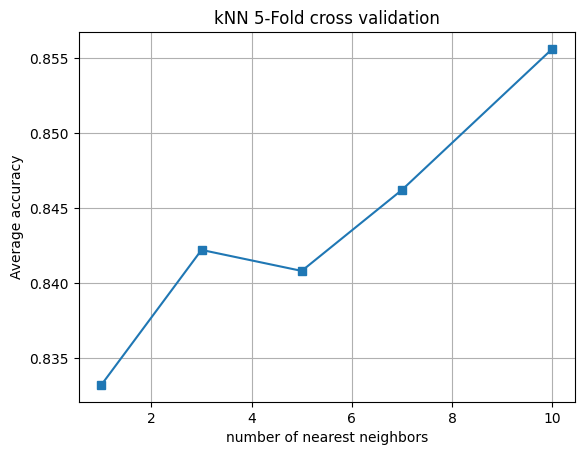

In [25]:
k_values = [1,3,5,7,10]
avg_accuracy_vals = list()
for k in k_values:
    avg_accuracy_vals.append(run_folds(df,k))
plt.plot(k_values,avg_accuracy_vals,marker='s')
plt.title("kNN 5-Fold cross validation")
plt.xlabel("number of nearest neighbors")
plt.ylabel("Average accuracy")
plt.grid()
plt.show()

In [26]:
#fold1
def run_folds(df,k=1,method='knn'):
    df_test_1 = df.iloc[:1000,]
    df_train_1 = df.drop(df_test_1.index)
    (a1,r1,p1)=run_fold_train_test(df_train_1,df_test_1,k,method)
    df_test_2 = df.iloc[1000:2000,]
    df_train_2 = df.drop(df_test_2.index)
    (a2,r2,p2)=run_fold_train_test(df_train_2,df_test_2,k)
    df_test_3 = df.iloc[2000:3000,]
    df_train_3 = df.drop(df_test_3.index)
    (a3,r3,p3)=run_fold_train_test(df_train_3,df_test_3,k)
    df_test_4 = df.iloc[3000:4000,]
    df_train_4 = df.drop(df_test_4.index)
    (a4,r4,p4)=run_fold_train_test(df_train_4,df_test_4,k)
    df_test_5 = df.iloc[4000:5000,]
    df_train_5 = df.drop(df_test_5.index)
    (a5,r5,p5)=run_fold_train_test(df_train_5,df_test_5,k)
    avg_accuracy = (a1+a2+a3+a4+a5)/5
    print("average accuracy=",avg_accuracy)
    return(avg_accuracy)
#print(df_test_1['Prediction'].value_counts())

In [27]:
run_folds(df,1,'asd')

/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


81 698 17 204
accuracy= 0.779 recall= 0.28421052631578947 precision= 0.826530612244898


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


240 613 110 37
accuracy= 0.853 recall= 0.8664259927797834 precision= 0.6857142857142857


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


238 624 92 46
accuracy= 0.862 recall= 0.8380281690140845 precision= 0.7212121212121212


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


240 611 95 54
accuracy= 0.851 recall= 0.8163265306122449 precision= 0.7164179104477612
232 543 151 74
accuracy= 0.775 recall= 0.7581699346405228 precision= 0.6057441253263708
average accuracy= 0.8240000000000001


/tmp/ipykernel_30029/1161165889.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rownum,(idx,val) in enumerate(Y_test.iteritems()):


0.8240000000000001

In [80]:
from sklearn import metrics
def give_scores(df_train,df_test,k=1,method='knn'):
    
    X_train = df_train.drop('Prediction',axis=1)
    Y_train  =df_train['Prediction']
    X_test = df_test.drop('Prediction',axis=1)
    
    
    test_res = run_training(X_train,Y_train,X_test,k,method,ret_type='scores')
    return(test_res)

def plot_roc(df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    df_test = df.iloc[:1000,]
    df_train = df.drop(df_test.index)
    scores_knn = give_scores(df_train,df_test,5,'knn')
    scores_log = give_scores(df_train,df_test,1,'logistic')
    y = df_test['Prediction'].values
    #print(scores_knn)
    metrics.RocCurveDisplay.from_predictions(y,scores_knn[:,1],name=f'kNeighborsClassifier',color='red',ax=ax1)
    metrics.RocCurveDisplay.from_predictions(y,scores_log,name=f'LogisticRegression',color='blue',ax=ax1)
    plt.title("ROC Comparison")
    plt.grid()
    plt.show()
   


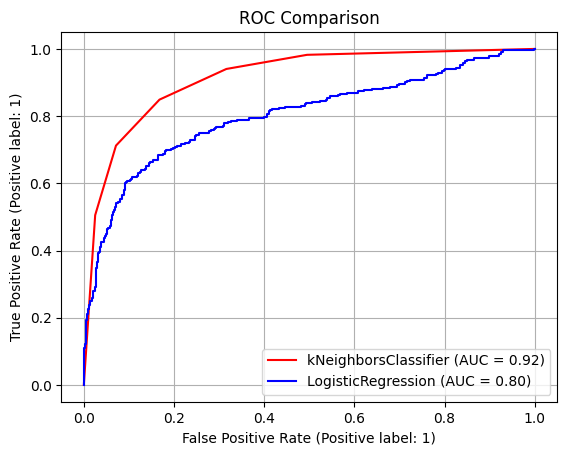

In [81]:
plot_roc(df)
